# Word2Vec

- 원-핫 벡터의 벡터간 유의미한 유사도를 계산할 수 없는 문제를 해결하는 방법
    - 한국 - 서울 + 도쿄 = 일본
    - 박찬호 - 야구 + 축구 = 호나우두

### 1. 희소 표현(Spare Representation)
- 벡터/행렬의 값이 대부분 0으로 표현되는 방법
    - 각 단어 벡터간 유의미한 유사성을 표현할 수 없는 단점이 있음
    - 대안으로 단어의 의미를 다차원 공간에 벡터화하는 방법 -> 분산 표현(distributed representation)

### 2. 분산 표현(Distributed Representation)
- '비슷한 문맥에서 등장하는 단어들은 비슷한 의미를 가진다' 라는 가정을 통해 만들어짐
    - 강아지 -> 귀엽다/예쁘다/애교 등과 함께 등장하는데, 가설에 따라 벡터화한다면 해당 단어들은 비슷한 벡터값을 가지게 된다.
- 위와 같이 표현된 차원이 단어 집합의 크기일 필요가 없으므로, 벡터의 차원이 상대적으로 저차원으로 줄어든다.
- 즉, 단어의 의미를 여러 차원에다가 분산하여 표현한다.
    - 단어 벡터 간 유의미한 유사도를 계산할 수 있다.

### 3. CBOW(Continuous Bag of Words)
- Word2Vec의 학습 방식 중 첫 번째
- CBOW : 주변에 있는 단어들을 입력으로 중간에 있는 단어들을 예측하는 방법
    - "The fat cat sat on the mat"
    - ['The','fat','cat','on','the','mat'] 으로 'sat'을 예측하는 것
    - sat -> 중심 단어 // 배열 -> 주변 단어
    - 중심 단어를 예측하기 위해 앞,뒤로 몇 개의 단어를 볼지 결정 : (window)
        - 윈도우 크기가 2, 예측하는 단어가 sat 이면 ['fat','cat'], ['on','the'] 를 참고한다.
        - 윈도우가 정해지면, 중심 단어를 바꿔가며 학습하는 데이터 셋을 만드는 것 -> 슬라이딩 윈도우
<p align='center'><img src= 'https://wikidocs.net/images/page/22660/단어.PNG'></p>   

- CBOW 인공신경망 간단하게 도식화
    - Word2Vec은 은닉층이 다수인 딥러닝 모델이 아니라, 1개인 얕은 신경망이다.
    - Word2Vec의 은닉층은 활성화 함수가 존재하지 않아 Projection Layer 이라고도 한다.    
<p align='center'><img src= 'https://wikidocs.net/images/page/22660/word2vec_renew_1.PNG'></p>

- Skip-Gram : 중간에 있는 단어들을 입력으로 주변 단어들을 예측하는 방법
    - CBOW 보다 성능이 높음
<p align='center'><img src='https://wikidocs.net/images/page/22660/word2vec_renew_6.PNG'></p>

NNLM 보다 학습 속도에서 우위를 가지는 이유는, 은닉층을 제거하였고, 소프트맥스 & 네거티브 샘플링을 하기 때문에 학습속도가 빠르다.

- NNLM : $ (n × m) + (n × m × h) + (h × V) $
- Word2Vec : $(n × m) + (m × log(V))$

# *실습하기*

### 1. 영어 Word2Vec 만들기

In [1]:
import re
import urllib.request
import zipfile
from lxml import etree
from nltk.tokenize import word_tokenize, sent_tokenize


1. 훈련 데이터 이해하기

In [2]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/09.%20Word%20Embedding/dataset/ted_en-20160408.xml", filename="ted_en-20160408.xml")

('ted_en-20160408.xml', <http.client.HTTPMessage at 0x14f81da60>)

- 훈련 데이터 파일은 xml 문법으로 작성되어 있어 자연어를 얻기 위해서는 전처리가 필요
    -  <.content>와 <./content> 사이의 내용만 사용
    - (Laughter) / (Applause) 와 같은 배경음 제거

2. 데이터 전처리 하기

In [3]:
targetXML = open('ted_en-20160408.xml', 'r', encoding='UTF8')
target_text = etree.parse(targetXML)

# xml 파일로부터 <content></content> 사이의 내용만 가져오기
parse_text = '\n'.join(target_text.xpath('//content/text()'))

# 정규 표현식의 sub 모듈로 (Audio),(Laughter) 배경음 부분 제거하기
# 괄호로 구성된 내용을 제거해준다.
content_text = re.sub(r'\([^)]*\)', '', parse_text)

# 입력 코퍼스에 대해서 NLTK를 이용하여 문장 토큰화 수행
sent_text = sent_tokenize(content_text)

# 각 문장에 대해서 구두점 제거, 대문자를 소문자로 변환
normalized_text = []
for string in sent_text:
    tokens = re.sub(r"[^a-z0-9]+", " ", string.lower())
    normalized_text.append(tokens)
    
# 각 문장에 대해서 NLTK를 이용하여 단어 토큰화를 수행
result = [word_tokenize(sentence) for sentence in normalized_text]

In [4]:
print("총 샘플의 수 : {}".format(len(result)))

총 샘플의 수 : 273380


In [5]:
# 샘플 3개만 출력
for line in result[:3]:
    print(line)
    

['here', 'are', 'two', 'reasons', 'companies', 'fail', 'they', 'only', 'do', 'more', 'of', 'the', 'same', 'or', 'they', 'only', 'do', 'what', 's', 'new']
['to', 'me', 'the', 'real', 'real', 'solution', 'to', 'quality', 'growth', 'is', 'figuring', 'out', 'the', 'balance', 'between', 'two', 'activities', 'exploration', 'and', 'exploitation']
['both', 'are', 'necessary', 'but', 'it', 'can', 'be', 'too', 'much', 'of', 'a', 'good', 'thing']


3. Word2Vec 훈련시키기

In [8]:
from gensim.models import Word2Vec, KeyedVectors

model = Word2Vec(sentences=result, vector_size=100, window=5, min_count=5, workers=4, sg=0)

- vector_size = 워드 벡터의 특징 값. 즉, 임베딩 된 벡터의 차원.
- window = 컨텍스트 윈도우 크기
- min_count = 단어 최소 빈도 수 제한 (빈도가 적은 단어들은 학습하지 않는다.)
- workers = 학습을 위한 프로세스 수
- sg = 0은 CBOW, 1은 Skip-gram.

Word2Vec은 입력한 단어에 대해서 가장 유사한 단어를 출력하는 Model.wv.most_similar를 지원해준다.

In [10]:
# man과 가장 유사한 단어 구하기
# 단어 유사도 가져오기
model_result = model.wv.most_similar("man")
print(model_result)

[('woman', 0.8426466584205627), ('guy', 0.8124483823776245), ('boy', 0.7683150768280029), ('lady', 0.7669482231140137), ('soldier', 0.7467086911201477), ('girl', 0.7355344295501709), ('gentleman', 0.7196527123451233), ('kid', 0.6867880821228027), ('poet', 0.6823352575302124), ('friend', 0.6650294661521912)]


4. Word2Vec모델 저장하고 로드하기

In [11]:
model.wv.save_word2vec_format('eng_w2v') # 모델 저장
loaded_model = KeyedVectors.load_word2vec_format("eng_w2v") # 모델 로드

In [13]:
model_result = loaded_model.most_similar('man')
model_result

[('woman', 0.8426466584205627),
 ('guy', 0.8124483823776245),
 ('boy', 0.7683150768280029),
 ('lady', 0.7669482231140137),
 ('soldier', 0.7467086911201477),
 ('girl', 0.7355344295501709),
 ('gentleman', 0.7196527123451233),
 ('kid', 0.6867880821228027),
 ('poet', 0.6823352575302124),
 ('friend', 0.6650294661521912)]

### 2. 한국어 Word2Vec 만들기

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt 
from tqdm import tqdm

In [25]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")

('ratings.txt', <http.client.HTTPMessage at 0x2caa0b8b0>)

In [26]:
train_data = pd.read_table('ratings.txt')
train_data.head()

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


In [27]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        200000 non-null  int64 
 1   document  199992 non-null  object
 2   label     200000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.6+ MB


In [28]:
train_data=train_data.dropna(how='any')
train_data.head()

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


In [29]:
# 정규 표현식으로 한글 외 문자 제거해주기
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣]", " ")

/var/folders/jw/_38j243d5qq977z0w467cxq00000gn/T/ipykernel_86216/637442668.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣]", " ")


In [30]:
train_data.head()

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,디자인을 배우는 학생으로 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...,1
2,4655635,폴리스스토리 시리즈는 부터 뉴까지 버릴께 하나도 없음 최고,1
3,9251303,와 연기가 진짜 개쩔구나 지루할거라고 생각했는데 몰입해서 봤다 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화,1


In [34]:
# 불용어 정의
stopwords = ['의', '가', '이', '은', '들', '는', '좀', '잘', '걍', '과', '도', '를',
             '으로', '자', '에', '와','한', '하다']

# 형태소 분석기 OKT를 사용한 토큰화 작업
okt = Okt()

tokenized_data = []
for sentence in tqdm(train_data['document']):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence
                                  if not word in stopwords] # 불용어 제거
    tokenized_data.append(stopwords_removed_sentence)

100%|██████████| 199992/199992 [07:41<00:00, 433.40it/s]


리뷰의 최대 길이 : 73
리뷰의 평균 길이 :  10.732819312772511


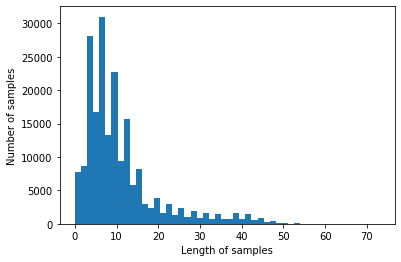

In [35]:
print("리뷰의 최대 길이 :", max(len(review) for review in tokenized_data))
print("리뷰의 평균 길이 : ", sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(review) for review in tokenized_data], bins=50)
plt.xlabel("Length of samples")
plt.ylabel("Number of samples")
plt.show()


Word2Vec 으로 토큰화된 네이버 영화 리뷰 데이터를 학습한다

In [36]:
from gensim.models import Word2Vec

model = Word2Vec(sentences = tokenized_data, vector_size=100, window=5,
                 min_count=5, workers=4, sg=0)


In [37]:
# 완성된 임베딩 매트릭스의 크기 확인
model.wv.vectors.shape

(16386, 100)

In [38]:
print(model.wv.most_similar('최민식'))

[('박중훈', 0.8634495139122009), ('안성기', 0.8413627743721008), ('한석규', 0.829960286617279), ('김명민', 0.8234652280807495), ('최민수', 0.8227699995040894), ('크리스찬', 0.8217244744300842), ('이정재', 0.8208061456680298), ('송강호', 0.8183004856109619), ('설경구', 0.8178545832633972), ('류덕환', 0.8124334812164307)]


In [39]:
print(model.wv.most_similar("히어로"))

[('슬래셔', 0.8697999715805054), ('무협', 0.8396877646446228), ('느와르', 0.8285381197929382), ('물', 0.8252530097961426), ('무비', 0.8177266716957092), ('호러', 0.8142393231391907), ('물의', 0.7998375296592712), ('블록버스터', 0.7928337454795837), ('홍콩', 0.7923600673675537), ('하이', 0.788041353225708)]


## 3. 사전 훈련된 Word2Vec 임베딩

- 방대한 데이터로 사전에 훈련된 워드 임베딩을 사용 할 수 있다.
- 예를 들어 감성 분류 작업 시, 훈련 데이터의 양이 부족한 솽황이라면, 다른 방대한 데이터를 Word2Vec 이나 GloVe등으로 사전에 학습시킨 임베딩 벡터를 가지고 모델의 입력으로 사용하여 더 좋은 성능을 가질 수 있다.

```python
import gensim
import urllib.request

# 구글의 사전 훈련된 Word2Vec 모델을 로드.
urllib.request.urlretrieve("https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz", \
                           filename="GoogleNews-vectors-negative300.bin.gz")
word2vec_model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)
```